# Semana 5: Notebook procesamiento de imágenes

### Alumno: Mario Alberto Lizarraga Reyes

Explorar las diferentes librerías en Python para el procesamiento digital de imágenes y aplicar 5 técnicas de entre ellas para el tratamiento de un arreglo, una imagen de internet, una fotografía, una secuencia de imágenes (video).

In [ ]:
import numpy as np
from PIL import Image, ImageFilter, ImageEnhance
from skimage import io, filters, color, transform, img_as_ubyte, exposure
import matplotlib.pyplot as plt
from scipy import ndimage
import imageio

image_path = 'M33.jpg' 
image_pil = Image.open(image_path)
image_np = np.array(image_pil)
image_skimage = io.imread(image_path)

In [41]:
# Función para mostrar imágenes originales y procesadas lado a lado
def show_vs(original, processed, title_processed, cmap=None):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(original) 
    axs[0].set_title('Original')
    axs[0].axis('off')

    axs[1].imshow(processed, cmap=cmap)
    axs[1].set_title(title_processed)
    axs[1].axis('off')

    plt.show()

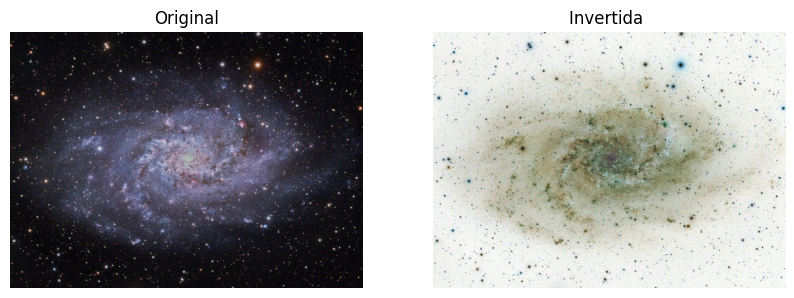

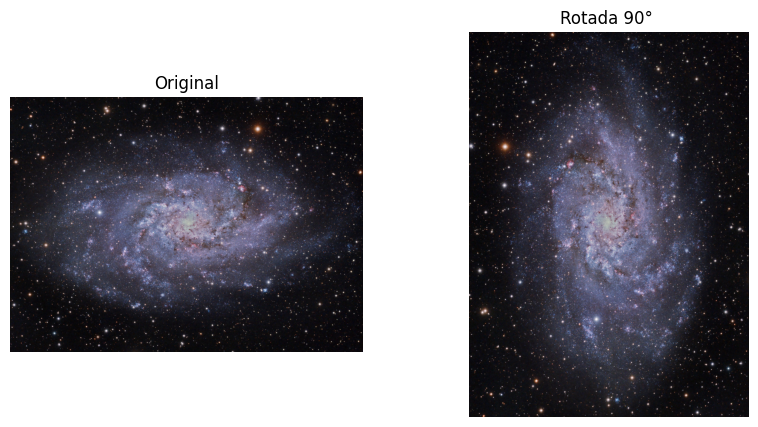

In [ ]:
# NumPy: Permite realizar cálculos rápidos y eficientes sobre arrays de píxeles.

# Invertir colores
inverted_np = 255 - image_np
show_vs(image_np, inverted_np, 'Invertida ')

# Rotar imagen 90 grados
rotated_np = np.rot90(image_np)
show_vs(image_np, rotated_np, 'Rotada 90° ')

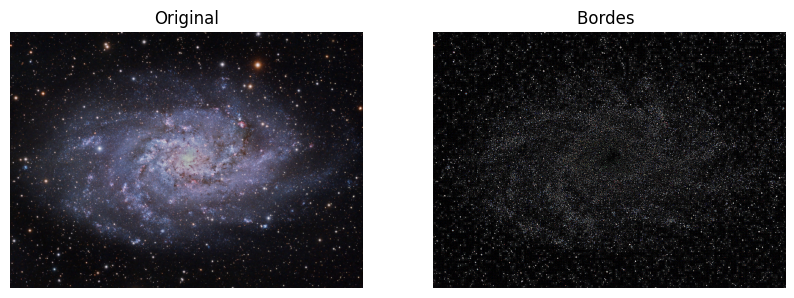

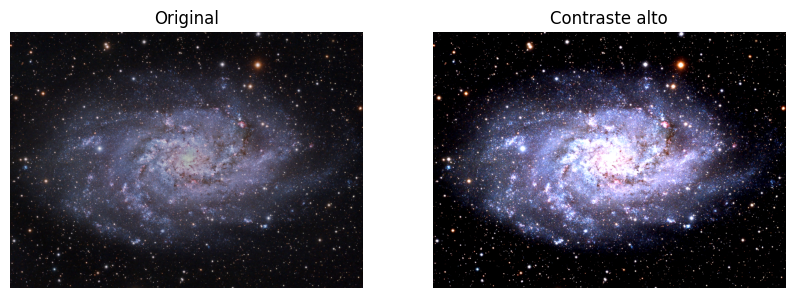

In [64]:
# PIL (Python Imaging Library): Proporciona filtros de imagen como detección de bordes y herramientas de mejora como el ajuste de contraste.

# Aplicar filtro de bordes
edges_pil = image_pil.filter(ImageFilter.FIND_EDGES)
show_vs(image_pil, edges_pil, 'Bordes ')

# Aumento de contraste
enhancer = ImageEnhance.Contrast(image_pil)
high_contrast_pil = enhancer.enhance(2.0)
show_vs(image_pil, high_contrast_pil, 'Contraste alto')

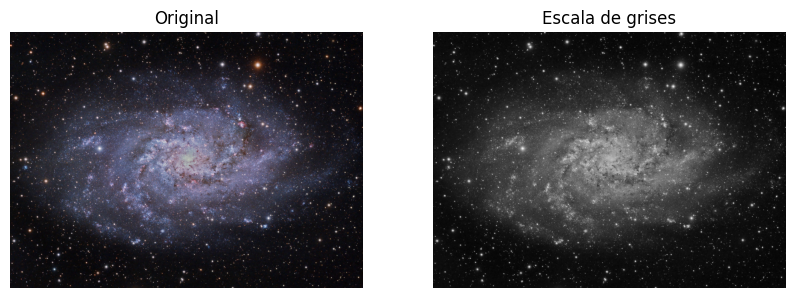

C:\Users\lizar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\skimage\_shared\utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


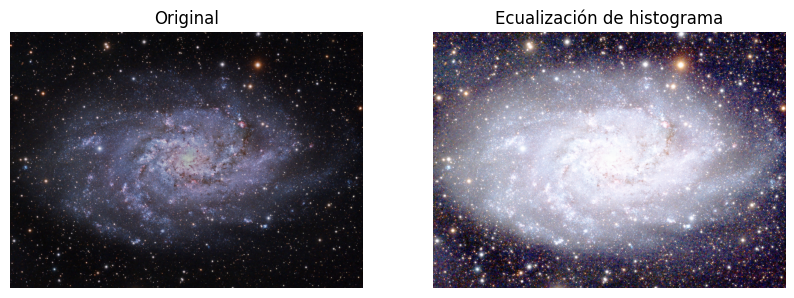

In [65]:
# Scikit: Incluye herramientas para filtrado, detección de bordes (como Sobel), ecualización de histograma y transformaciones geométricas.

# Convertir a escala de grises
gray_skimage = color.rgb2gray(image_skimage)
show_vs(image_skimage, gray_skimage, 'Escala de grises', cmap='gray')

# Ecualización del histograma
equalized_skimage = exposure.equalize_hist(image_skimage)
show_vs(image_skimage, equalized_skimage, 'Ecualización de histograma')


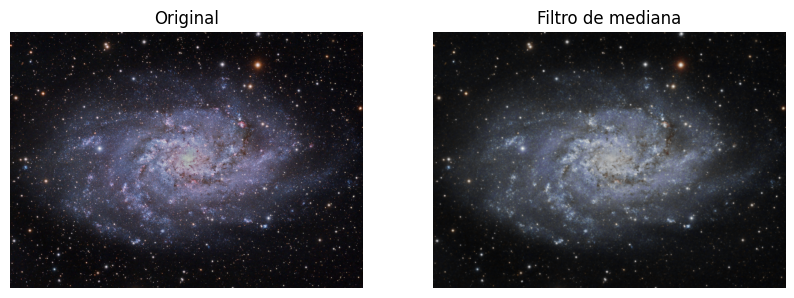

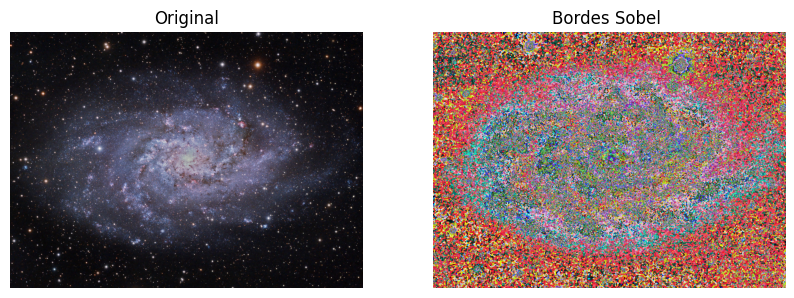

In [67]:
# SciPy: Extiende las capacidades de NumPy para procesamiento de imágenes, especialmente en el filtrado y análisis de imágenes multidimensionales.

# Aplicar filtro de mediana
median_scipy = ndimage.median_filter(image_np, size=3)
show_vs(image_np, median_scipy, 'Filtro de mediana')

# Detectar bordes usando el operador de Sobel
sobel_scipy = ndimage.sobel(image_np)
show_vs(image_np, sobel_scipy, 'Bordes Sobel ', cmap='gray')

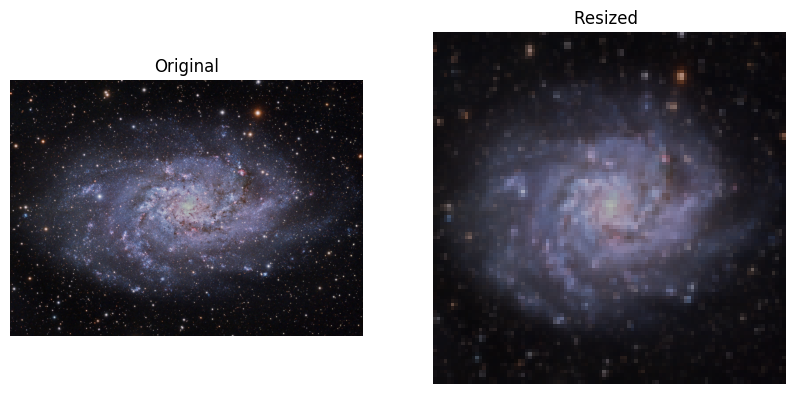

In [39]:
# Skimage
# Función para redimensionar imagen
resized_skimage = transform.resize(image_skimage, (100, 100))
show_vs(image_skimage, resized_skimage, 'Resized ')


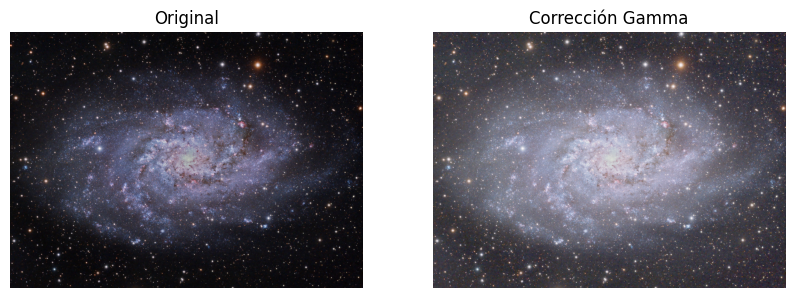

In [68]:
# imageio: Soporta operaciones simples como rotación y manipulación del brillo mediante la corrección gamma.

# Aplicar corrección gamma usando imageio
corrected_gamma = exposure.adjust_gamma(image_np, gamma=0.5)
show_vs(image_np, corrected_gamma, 'Corrección Gamma')

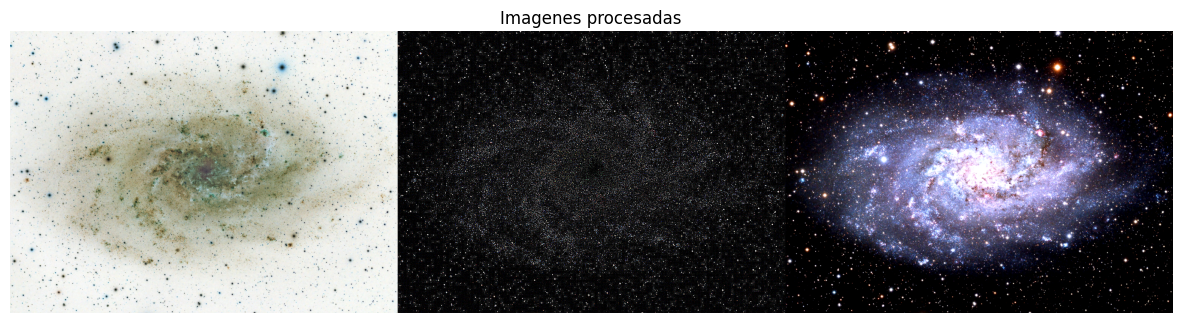

In [69]:
# Función para desplegar  tres imágenes procesadas
def combine_images(img1, img2, img3, method='horizontal'):
    if method == 'horizontal':
        combined = np.hstack((img1, img2, img3))
    elif method == 'vertical':
        combined = np.vstack((img1, img2, img3))
        
    plt.figure(figsize=(15, 5) if method == 'horizontal' else (5, 15))
    plt.imshow(combined)
    plt.axis('off')
    plt.title('Imagenes procesadas')
    plt.show()

combine_images(inverted_np, edges_pil, high_contrast_pil, method='horizontal')


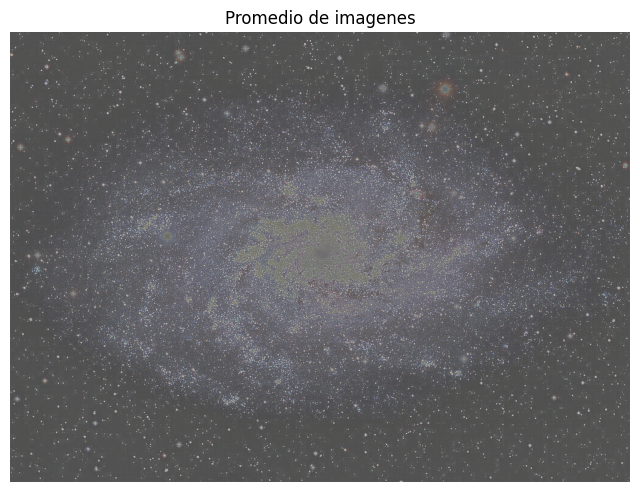

In [59]:
# Función para combinar tres imágenes usando promedio (Por curiosidad)
def blend_images(img1, img2, img3):

    # Convertir a arrays de NumPy
    if isinstance(img1, Image.Image):
        img1 = np.array(img1)
    if isinstance(img2, Image.Image):
        img2 = np.array(img2)
    if isinstance(img3, Image.Image):
        img3 = np.array(img3)

    # Asegurar que todas las imágenes tengan el mismo tamaño
    min_shape = np.min([img1.shape, img2.shape, img3.shape], axis=0)
    img1 = img1[:min_shape[0], :min_shape[1]]
    img2 = img2[:min_shape[0], :min_shape[1]]
    img3 = img3[:min_shape[0], :min_shape[1]]

    blended = (img1.astype(float) + img2.astype(float) + img3.astype(float)) / 3
    blended = np.clip(blended, 0, 255).astype(np.uint8)  # Asegurar que los valores estén en el rango correcto

    plt.figure(figsize=(8, 8))
    plt.imshow(blended)
    plt.axis('off')
    plt.title('Promedio de imagenes')
    plt.show()

blend_images(inverted_np, edges_pil, high_contrast_pil)